#################################
##    뉴스 기사 요약 전처리   ##
#################################

0. 라이브러리 임포트

In [67]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import time
from tqdm import tqdm

1. 데이터 불러오기 및 합치기

In [68]:
raw_train_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/train.csv')
raw_valid_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/valid.csv')

raw_df = pd.concat([raw_train_df, raw_valid_df], ignore_index=True)

print(f'원본 트레인 데이터 길이 : {len(raw_train_df)}')
print(f'원본 검증 데이터 길이 : {len(raw_valid_df)}')
print(f'예상 최종 데이터 길이 : {len(raw_train_df)+len(raw_valid_df)}')
print(f'실제 데이터 길이 : {len(raw_df)}')
print(raw_df.head())

원본 트레인 데이터 길이 : 243983
원본 검증 데이터 길이 : 30122
예상 최종 데이터 길이 : 274105
실제 데이터 길이 : 274105
                           title  \
0         논 타작물 재배, 2월 말까지 신청하세요   
1  여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성   
2        “새해 정기 받고 올해는 반드시 일내자!”   
3          농업인 역량 강화, 새해 실용교육 실시   
4          타이완 크루즈관광객 4천여명‘전남’온다   

                                            sentence  \
0  ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1  8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2  전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3  11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4  홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   

                                                 abs  
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...  
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...  
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...  
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...  
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...  


2. title 열 날리기

In [69]:
raw_df = raw_df.iloc[:, 1:]
print(raw_df.head())

                                            sentence  \
0  ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1  8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2  전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3  11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4  홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   

                                                 abs  
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...  
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...  
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...  
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...  
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...  


3. 정규 표현식

In [70]:
sentence = raw_df['sentence']
abs = raw_df['abs']

print("정규 표현식 적용 전 데이터 프레임")
print(raw_df[20:30])

def regex_column(columnList):
  if not isinstance(columnList, str):                                                   # Nan을 빈 문자열로 대체
      return ''
  columnList = re.sub(r'\S+@\S+\.\S+', '', columnList)                                  # 이메일 삭제
  columnList = columnList.replace('\n', '')                                             # 개행 삭제
  columnList = re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', columnList)                       # 소,중,대괄호 내용 삭제
  columnList = re.sub(r'[^가-힣a-zA-Z0-9\u4e00-\u9fff\s.,!?\'\"~]', ' ', columnList)    # 이상한 특수문자 삭제
  columnList = re.sub(r'\s+', ' ', columnList).strip()                                  # 양 끝 공백 삭제
  return columnList

sentence = sentence.apply(regex_column)
abs = abs.apply(regex_column)

df = pd.DataFrame({
    'sentence':sentence,
    'abs':abs
})

print("\n정규 표현식 적용 후 데이터 프레임")
print(df[20:30])

정규 표현식 적용 전 데이터 프레임
                                             sentence  \
20  광양상의, 기업 경기 현황 조사…기업들, 보수적 경영활동 강화 이성훈 sinawi@...   
21  내 인생 첫 스크린‘광양 제일극장’ 광양뉴스 webmaster@gynet.co.kr...   
22  중마도서관‘나만의 그림책 만들기’10권 제작 이성훈 sinawi@hanmail.ne...   
23  1월 말까지, 읍면동 농업인상담소에 신청 이성훈 sinawi@hanmail.net ...   
24  누락자 발생예방 위한 홍보·접수‘총력’ 이성훈 sinawi@hanmail.net 광...   
25  어린이들의 꿈과 희망을 찾는‘희망도서관’ 김영신 기자 yskim0966@naver....   
26  31일까지…위택스? 이성훈 sinawi@hanmail.net 광양시는 매년 6월과 ...   
27  도로점용허가 필수, 규격? 이성훈 sinawi@hanmail.net 광양시는 올해 ...   
28  ‘아이 양육하기 좋은 도시’탄력 기대 이성훈 sinawi@hanmail.net 광양...   
29  시민과 1:1 카톡방…SNS 소통행정 확대 이성훈 sinawi@hanmail.net...   

                                                  abs  
20  광양상공회의소 1분기 기업경기전망 지수(BSI)를 조사한 결과 올해 경기 전망은 지...  
21  80년대 초반 광양 제일극장은 동시대를 살아온 사람들의 추억이 엮여있는 문화의 공간...  
22  광양시가 지난해 3월부터 중마도서관의 성인 대상 야간 프로그램인 ‘나만의 그림책 만...  
23  광양시는 올해 과수·채소·화훼·특작, 식량작물, 기술지원 등 5개 분야 18개 사업...  
24  광양시는 8일 ‘광양시 일자리 안정자금 지원단’ 협의회를 개최하고 일자리 안정자금 ...  
25  ‘희망도서관’은 책을 

4. 난수 날리기

In [71]:
print(f'난수 날리기 전 데이터프레임 길이 : {len(df)}')
df = df.dropna()
print(f'난수 날리기 후 데이터프레임 길이 : {len(df)}')

난수 날리기 전 데이터프레임 길이 : 274105
난수 날리기 후 데이터프레임 길이 : 274105


5. 문자열 길이 제한 하기

5-1. 문자열 길이 시각화


Sentence 열 길이:
최대 길이: 6741, 최소 길이: 3, 평균 길이: 660.49

Abs 열 길이:
최대 길이: 682, 최소 길이: 0, 평균 길이: 127.50


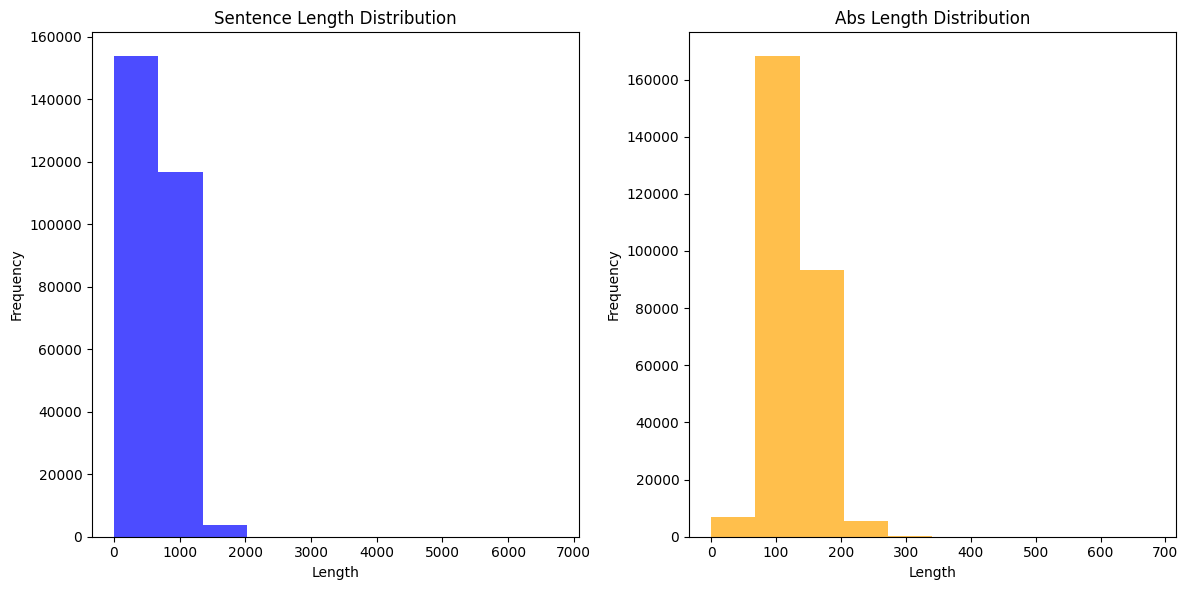

In [72]:
def data_length_distribution(df, sentence='sentence', abs='abs'):
  df['sentence_length'] = df[sentence].apply(len)
  df['abs_length'] = df[abs].apply(len)

  sentence_max_length = df['sentence_length'].max()
  sentence_min_length = df['sentence_length'].min()
  sentence_mean_length = df['sentence_length'].mean()

  abs_max_length = df['abs_length'].max()
  abs_min_length = df['abs_length'].min()
  abs_mean_length = df['abs_length'].mean()

  print("\nSentence 열 길이:")
  print(f"최대 길이: {sentence_max_length}, 최소 길이: {sentence_min_length}, 평균 길이: {sentence_mean_length:.2f}")

  print("\nAbs 열 길이:")
  print(f"최대 길이: {abs_max_length}, 최소 길이: {abs_min_length}, 평균 길이: {abs_mean_length:.2f}")

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(df['sentence_length'], bins=10, color='blue', alpha=0.7)
  plt.title('Sentence Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(df['abs_length'], bins=10, color='orange', alpha=0.7)
  plt.title('Abs Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['sentence_length','abs_length'])
  
data_length_distribution(df)


5-2. 길이 제한


Sentence 열 길이:
최대 길이: 1199, 최소 길이: 11, 평균 길이: 633.87

Abs 열 길이:
최대 길이: 199, 최소 길이: 12, 평균 길이: 124.62


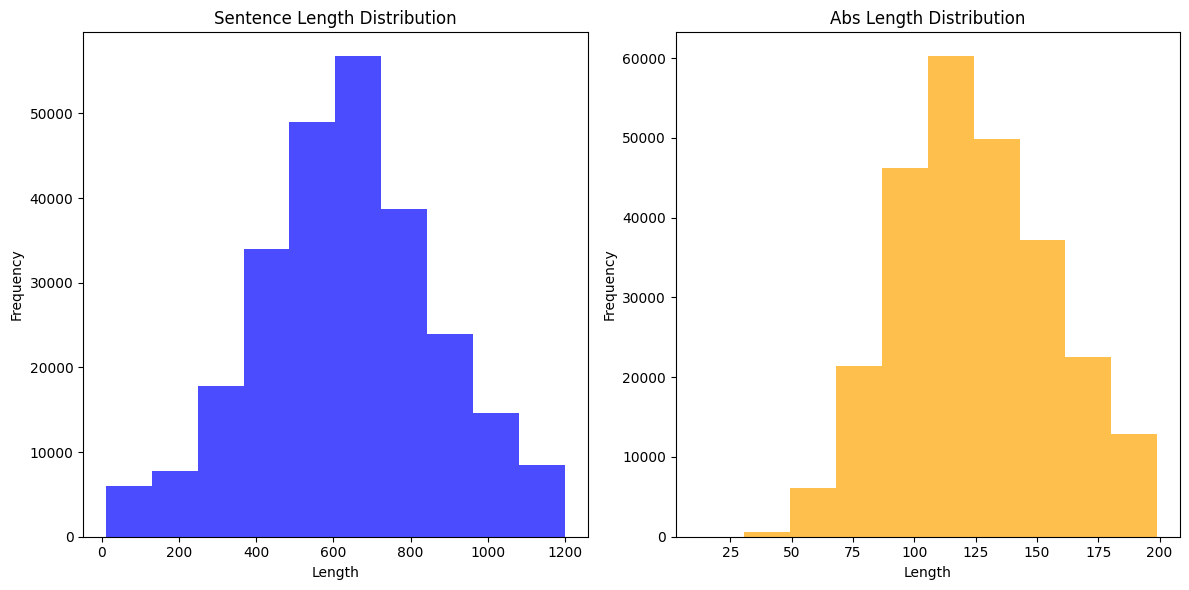

길이 제한 전 데이터 프레임 길이 : 274105
길이 제한 후 데이터 프레임 길이 : 256892
삭제 된 행 : 17213


In [73]:
pre_length = len(df)

df = df[(df['sentence'].str.len() > 10) & (df['sentence'].str.len() < 1200)]
df = df[(df['abs'].str.len() > 10) & (df['abs'].str.len() < 200)]

data_length_distribution(df)

after_length = len(df)

print(f'길이 제한 전 데이터 프레임 길이 : {pre_length}')
print(f'길이 제한 후 데이터 프레임 길이 : {after_length}')
print(f'삭제 된 행 : {pre_length-after_length}')

6. 토큰화

6-1. SubwordTokenizer 실행

In [75]:
sentences = []
for sentence in df['sentence']:
    sentences.append(sentence)
abs = []
for sentence in df['abs']:
    abs.append(sentence)

start_time = time.time()

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    sentences + abs, target_vocab_size = 2**14
)

end_time = time.time()
total_time = end_time - start_time

print(f"토크나이저 총 소요 시간: {total_time:.2f}초")
tokenizer.save_to_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizer')

토크나이저 총 소요 시간: 4214.74초


6-2. 토큰화 검증

In [76]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizer')

print(f'토큰 크기: {tokenizer.vocab_size}')
print(f'토큰 예시: {tokenizer.subwords[:10]}')
print(f'인코딩 테스트 - 전: {sentences[19]}')
encodingList = tokenizer.encode(sentences[19])
print(f'인코딩 테스트 - 후: {encodingList}')

토큰 크기: 16355
토큰 예시: ['. ', ', ', '을_', '의_', '에_', '이_', '는_', '를_', '고_', '은_']
인코딩 테스트 - 전: 총 12개소 대상, 위험요소 사전 차단 김영신 기자 광양시는 광양소방서와 함께 시민들이 많이 이용하고 있는 다중이용시설 중 화재에 취약한 건축물을 대상으로 소방 특별점검을 실시했다. 이번 소방 특별점검은 화재가 발생해 인명피해가 발생한 제천 노블휘트니스 스파와 유사한 건물 3개소와 인명피해가 우려되는 다중이용시설 9개소 등 총 12개소를 대상으로 진행됐다. 소방공무원과 관련 전문가, 공무원으로 구성된 점검반은 지난 3일부터 화재 시 피난 할 수 있는 비상구 폐쇄 및 비상구나 피난통로에 장애물 설치 여부, 소방시설 정상작동 여부와 관리 상태 등 화재위험과 인명피해 우려되는 요소들을 집중적으로 점검했다. 조사결과 소방시설 불량과 건축물 임의 증축, 비상구 다른 용도 활용 등으로 적발된 곳에는 현지 시정명령 등의 조치를 취했으며, 소방서에서도 소방시설 불량사항에 대한 조치명령 발부와 취약대상 소방시설을 대상으로 소방훈련을 실시할 계획이다. 조춘규 안전총괄과장은 다중복합시설은 내부 구조가 복잡해 화재가 발생하면 연기로 인해 비상구를 찾기 매우 어렵다 며 건물 관리자는 피난통로의 장애물을 제거하고 소방시설 정상 작동을 확인하고, 이용자는 비상구를 미리 확인하는 등 모두가 관심을 가져야 인명피해를 막을 수 있다 고 당부했다. 한편, 소방당국은 제천 화재사고와 유사 건물 12개소 외에도 일반 숙박시설 등을 지속적으로 점검해 화재 발생에 강력히 대응해 나갈 방침이다.
인코딩 테스트 - 후: [106, 10078, 741, 1340, 2, 1512, 4613, 16131, 1853, 13297, 2459, 864, 198, 5862, 7, 2079, 7260, 20, 53, 2585, 769, 3419, 9, 27, 10568, 13433, 1027, 55, 2068, 5, 12989, 6324, 3, 149,